In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_naive = pd.read_csv("graph_data/naive_kruskals_runtime.csv")
df_improved = pd.read_csv("graph_data/improved_kruskals_runtime.csv")

# df_naive = pd.read_csv("data/naive_kruskals_runtime.csv")
# df_improved = pd.read_csv("data/improved_kruskals_runtime.csv")


In [14]:
group1 = df_naive.groupby('Input Size')['1.0'].mean()
group2 = df_improved.groupby('Input Size')['1.0'].mean()

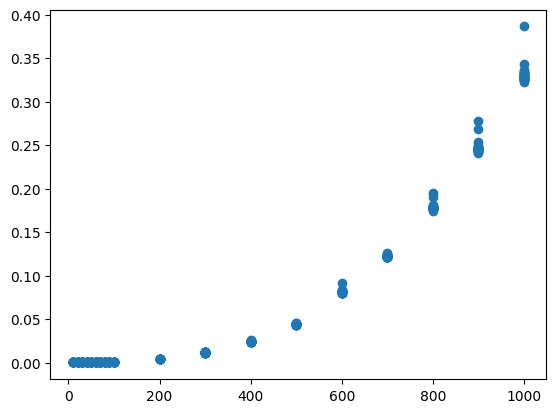

In [15]:
plt.scatter(df_naive['Input Size'], df_naive['0.1'])
plt.show()

# Runtime Graphing

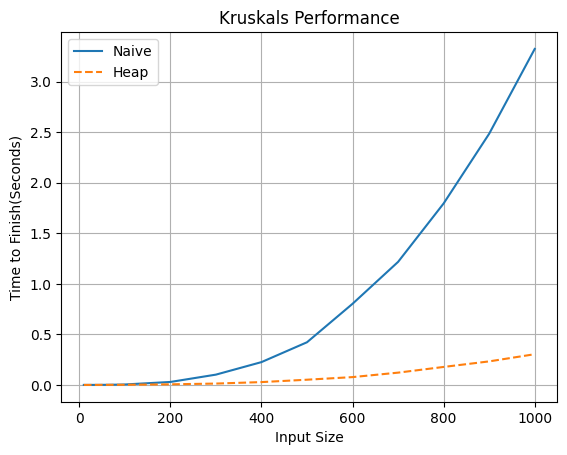

In [20]:
plt.plot(group1, label="Naive", linestyle = '-')
plt.plot(group2, label="Heap", linestyle = '--')

plt.title('Kruskals Performance')
plt.xlabel('Input Size')
plt.ylabel('Time to Finish(Seconds)')
plt.legend()
plt.grid(True)
plt.show()

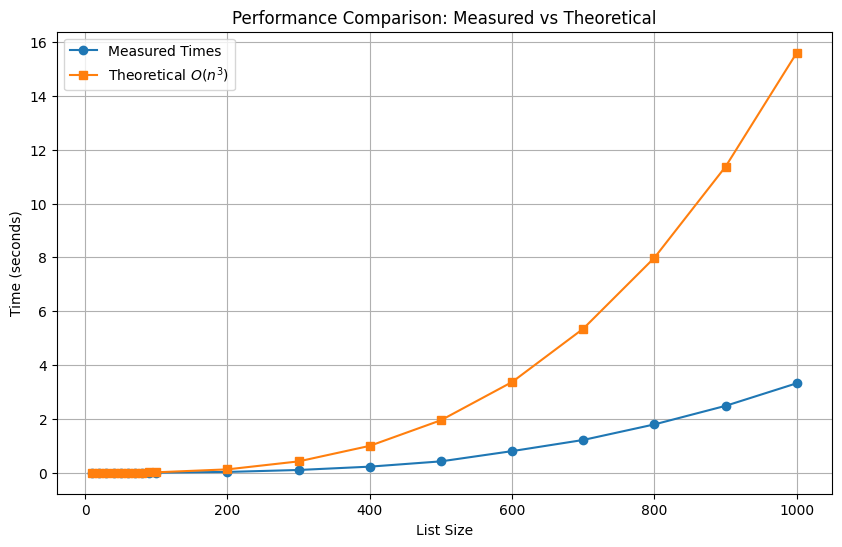

In [17]:
# Create a new DataFrame from the group object
df = group1.reset_index()
df.rename(columns={"Measured Time (s)": "Average Measured Time (s)"}, inplace=True)

# Compute a simple polynomial line
polynomial_c = df["1.0"].iloc[1] / (df["Input Size"].iloc[1] ** 3)
df["Polynomial Time (s)"] = polynomial_c * (df["Input Size"] ** 3)

# Plot using pandas
plt.figure(figsize=(10, 6))
plt.plot(df["Input Size"], df["1.0"], 'o-', label="Measured Times")
plt.plot(df["Input Size"], df["Polynomial Time (s)"], 's-', label=r"Theoretical $O(n^3)$")


plt.xlabel("List Size")
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison: Measured vs Theoretical")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


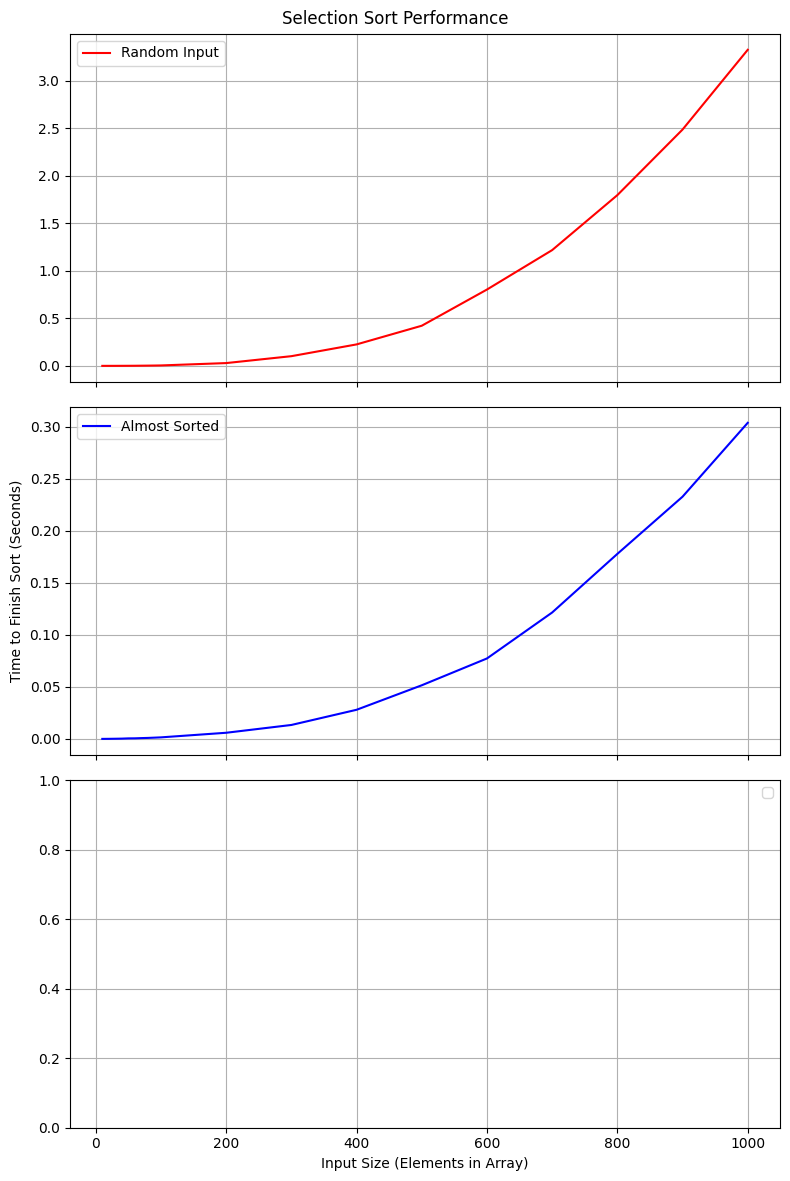

In [18]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 12))
ax[0].plot(group1, label='Random Input', color='red')
ax[1].plot(group2, label='Almost Sorted', color='blue')


for a in ax:
    a.legend()
    a.grid(True)

ax[1].set_ylabel('Time to Finish Sort (Seconds)')
plt.suptitle('Selection Sort Performance')
plt.xlabel('Input Size (Elements in Array)')
plt.tight_layout()
plt.show()

# Memory Graphing

In [19]:
group1_mem = df_random.groupby('List Size')['Peak Memory Usage (bytes)'].mean()
group2_mem = df_almost.groupby('List Size')['Peak Memory Usage (bytes)'].mean()
group3_mem = df_reverse.groupby('List Size')['Peak Memory Usage (bytes)'].mean()

NameError: name 'df_random' is not defined

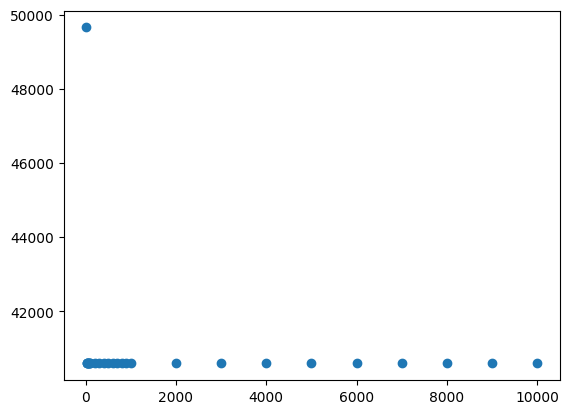

In [ ]:
plt.scatter(group2_mem.index, group2_mem)
plt.show()

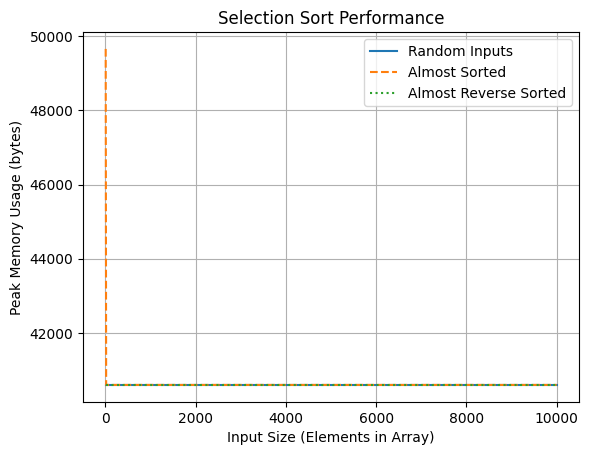

In [ ]:
plt.plot(group1_mem, label="Random Inputs", linestyle = '-')
plt.plot(group2_mem, label="Almost Sorted", linestyle = '--')
plt.plot(group3_mem, label="Almost Reverse Sorted", linestyle = ':')

plt.title('Selection Sort Performance')
plt.xlabel('Input Size (Elements in Array)')
plt.ylabel('Peak Memory Usage (bytes)')
plt.legend()
plt.grid(True)
plt.show()

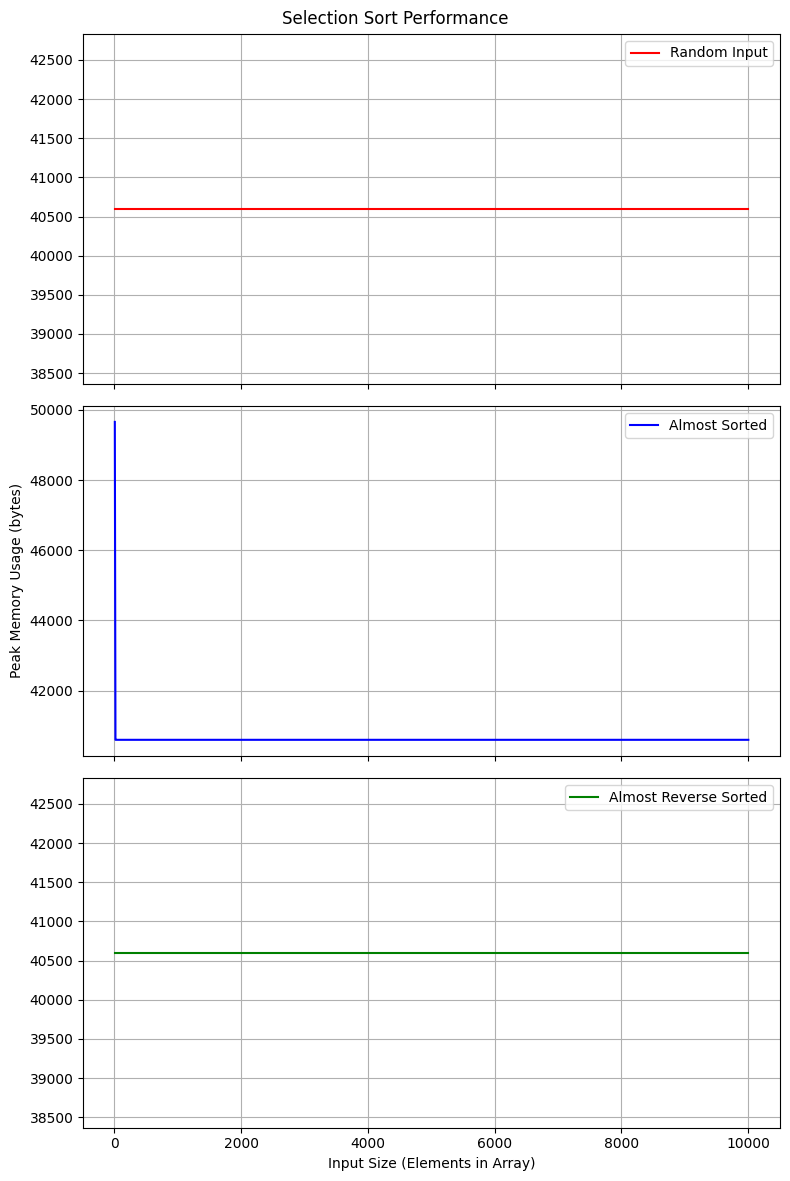

In [ ]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 12))
ax[0].plot(group1_mem, label='Random Input', color='red')
ax[1].plot(group2_mem, label='Almost Sorted', color='blue')
ax[2].plot(group3_mem, label='Almost Reverse Sorted', color='green')

for a in ax:
    a.legend()
    a.grid(True)


ax[1].set_ylabel('Peak Memory Usage (bytes)')
plt.suptitle('Selection Sort Performance')
plt.xlabel('Input Size (Elements in Array)')
plt.tight_layout()
plt.show()